In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import gym
import numpy as np

In [10]:
def eps_greedy_q_learning_with_table(env, num_episodes=500):
    q_table = np.zeros((5, 2))
    y = 0.95
    eps = 0.5
    lr = 0.8
    decay_factor = 0.999
    vals = []
    for i in range(num_episodes):
        s = env.reset()
        eps *= decay_factor
        done = False
        rew = 0
        while not done:
            # select the action with highest cummulative reward
            if np.random.random() < eps or np.sum(q_table[s, :]) == 0:
                a = np.random.randint(0, 2)
            else:
                a = np.argmax(q_table[s, :])
            # pdb.set_trace()
            new_s, r, done, _ = env.step(a)
            rew += r
            q_table[s, a] += r + lr * (y * np.max(q_table[new_s, :]) - q_table[s, a])
            s = new_s
        vals.append(rew)
    print(max(vals))
    return vals #q_table


env = gym.make('NChain-v0')
env.reset
vals = eps_greedy_q_learning_with_table(env, 2000)

3008


In [11]:
data_y = vals
data_x = range(len(data_y))

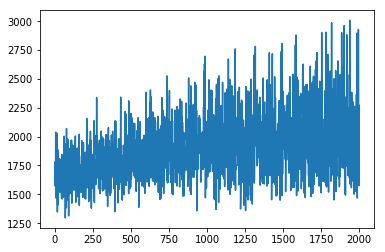

In [12]:
plt.plot(data_x, data_y)
plt.show()